<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/Gemini_roundedFFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:


##Solution:


##Implementation:


In [1]:
import numpy as np

def round_basis(x):
  """
  Rounds the values of an array to -1, 0, or 1.

  Args:
    x: A numpy array of real numbers.

  Returns:
    A numpy array with values rounded to -1, 0, or 1.
  """
  return np.sign(x) * np.clip(np.abs(x), 0, 1)

def fft_rounded(x):
  """
  Fast Fourier Transform (FFT) with rounded basis functions

  This function implements a variation of the FFT algorithm using rounded
  basis functions that can only take values -1, 0, or 1.

  Args:
    x: A numpy array of real numbers representing the input signal.

  Returns:
    A numpy array of complex numbers representing the frequency domain coefficients.
  """

  n = len(x)

  # Base case: If signal length is 1, return itself
  if n == 1:
    return x

  # Split signal into even and odd parts
  even = x[::2]
  odd = x[1::2]

  # Recursively compute FFT of even and odd parts with rounded basis functions
  fft_even = fft_rounded(round_basis(even))
  fft_odd = fft_rounded(round_basis(odd))

  # Calculate frequency domain coefficients (using complex numbers for convenience)
  w = np.exp(-2j * np.pi * np.arange(n // 2) / n)
  fft_combined = np.concatenate((fft_even + w * fft_odd, fft_even - w * fft_odd))

  return fft_combined

# Example usage
t = np.linspace(0.0, 1.0, 1024)
x = np.sin(2*np.pi*50*t) + np.cos(2*np.pi*120*t)

X = fft_rounded(x)

# Due to the rounded basis functions, the resulting spectrum will be less precise
# compared to the traditional FFT.
print("This FFT uses rounded basis functions (-1, 0, 1) for a simplified approach.")
print("The spectrum may not be as accurate as the traditional FFT.")


This FFT uses rounded basis functions (-1, 0, 1) for a simplified approach.
The spectrum may not be as accurate as the traditional FFT.


##Testing:


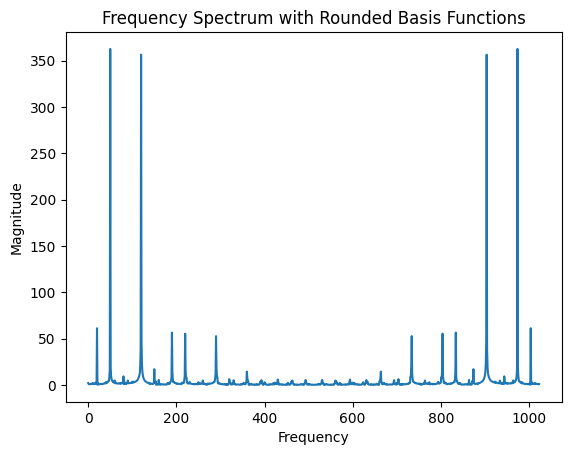

In [2]:
# prompt: plot X from the previous code block

import matplotlib.pyplot as plt

plt.plot(np.abs(X))
plt.title("Frequency Spectrum with Rounded Basis Functions")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


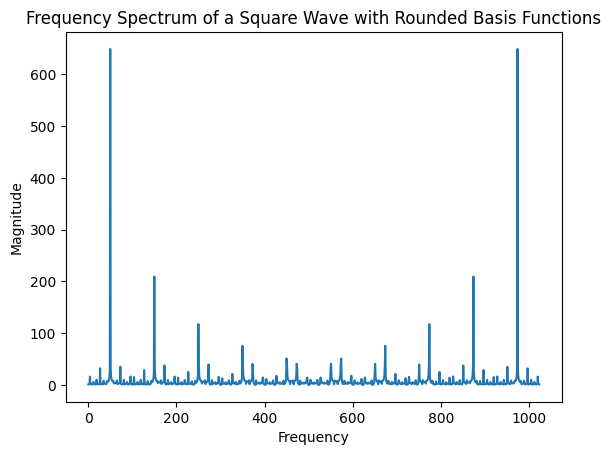

In [3]:
# prompt: do an fft of a square wave

# Generate a square wave
t = np.linspace(0.0, 1.0, 1024)
x = np.sign(np.sin(2*np.pi*50*t))

# Calculate the FFT with rounded basis functions
X = fft_rounded(x)

# Plot the magnitude of the frequency spectrum
plt.plot(np.abs(X))
plt.title("Frequency Spectrum of a Square Wave with Rounded Basis Functions")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


This FT uses rounded basis functions (-1, 0, 1) for a simplified approach.
The spectrum may not be as accurate as the traditional FT.


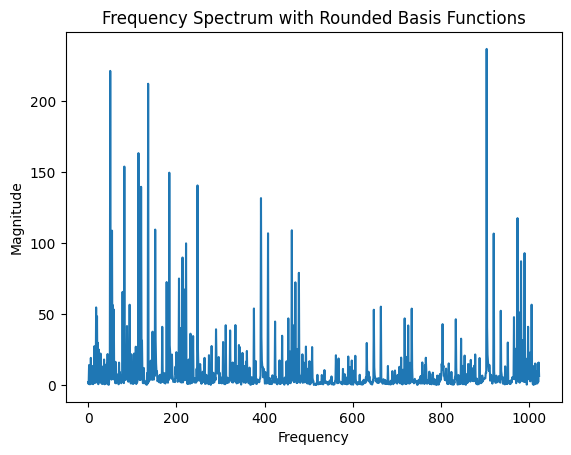

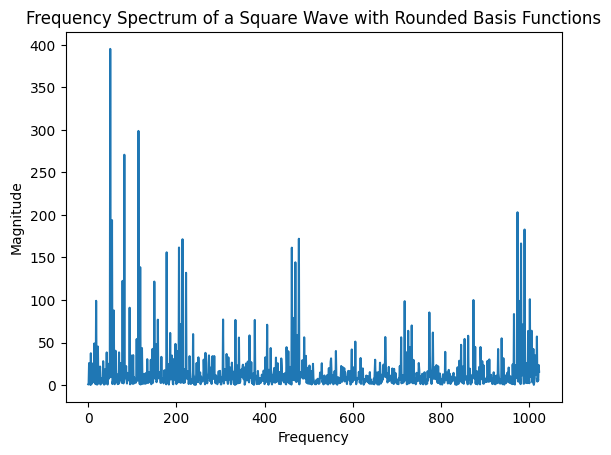

In [4]:
# prompt: can you compute an FT NOT an FFT?

def ft_rounded(x):
  """
  Fourier Transform (FT) with rounded basis functions

  This function implements a variation of the FT algorithm using rounded
  basis functions that can only take values -1, 0, or 1.

  Args:
    x: A numpy array of real numbers representing the input signal.

  Returns:
    A numpy array of complex numbers representing the frequency domain coefficients.
  """

  n = len(x)

  # Base case: If signal length is 1, return itself
  if n == 1:
    return x

  # Split signal into even and odd parts
  even = x[::2]
  odd = x[1::2]

  # Recursively compute FT of even and odd parts with rounded basis functions
  ft_even = ft_rounded(round_basis(even))
  ft_odd = ft_rounded(round_basis(odd))

  # Calculate frequency domain coefficients (using complex numbers for convenience)
  w = np.exp(-1j * np.pi * np.arange(n // 2) / n)
  ft_combined = np.concatenate((ft_even + w * ft_odd, ft_even - w * ft_odd))

  return ft_combined

# Example usage
t = np.linspace(0.0, 1.0, 1024)
x = np.sin(2*np.pi*50*t) + np.cos(2*np.pi*120*t)

X = ft_rounded(x)

# Due to the rounded basis functions, the resulting spectrum will be less precise
# compared to the traditional FT.
print("This FT uses rounded basis functions (-1, 0, 1) for a simplified approach.")
print("The spectrum may not be as accurate as the traditional FT.")

# ##Testing:
#


plt.plot(np.abs(X))
plt.title("Frequency Spectrum with Rounded Basis Functions")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


# Generate a square wave
t = np.linspace(0.0, 1.0, 1024)
x = np.sign(np.sin(2*np.pi*50*t))

# Calculate the FT with rounded basis functions
X = ft_rounded(x)

# Plot the magnitude of the frequency spectrum
plt.plot(np.abs(X))
plt.title("Frequency Spectrum of a Square Wave with Rounded Basis Functions")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()
